<a href="https://colab.research.google.com/github/Audeon/fastai_Notebooks/blob/main/Chapter_3_Digit_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit identification project

In this project we are going to use basic digit identification of 3, and 7. We will use the MNIST dataset in this case. 

I have split the notbook up into sections to make it easier for me to reference in the future. This doesnt really refelct the breakup in the book. Covers points i find most useful.

# Imports

In [1]:
!pip install -q fastai --upgrade
!pip install -q fastbook --upgrade

     |████████████████████████████████| 189 kB 2.8 MB/s 
     |████████████████████████████████| 55 kB 1.5 MB/s 
     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 48 kB 3.1 MB/s 
     |████████████████████████████████| 1.2 MB 30.7 MB/s 
     |████████████████████████████████| 51 kB 179 kB/s 
     |████████████████████████████████| 558 kB 56.2 MB/s 
     |████████████████████████████████| 130 kB 53.0 MB/s 


In [2]:
from fastbook import *
from fastai import *
from fastai.vision.all import *


# Getting the MNIST dataset and turning it into tensors
In this section we are going to get the MNIST dataset, do some experimenting on it, including turning them into tensors and visualizing those tensors the way the computer does.

First we will get the MNIST dataset and untar it into the path variable.

In [3]:
path = untar_data(URLs.MNIST)

We can use the LS command with any paths we create using untar to see what is in that directory. We can also view the subdirectories, as seen in the second block of code here.

In [4]:
 path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [5]:
sevens = (path/'training'/'7').ls().sorted()
threes = (path/'training'/'3').ls().sorted()

Now that we have all of the datasets untarred and in useful arrays lets work display a few of them.

In [6]:
img3_path = threes[242]
im3 = Image.open(img3_path)
im3

In [7]:
img3_path = threes[1]
im3 = Image.open(img3_path)
im3

For us to do any work on the images of course they need to be converted to a tensor or an array. Here we have an example of each. Notice in the second example we used the 4:10 to indicate we want rows from indext 4 to index 10 and the same for the columns. 

In [8]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [9]:
tensor(im3)[4:15, 4:22]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2,   0,   0],


We can use panads Dataframe to color code each of the tensor cells on a gradiant. 

In [10]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


# Pixel Similarity - Start
In this section we are going to discuss and start working through pixel similarity. This work will also cover the next few sections.



---


**Chapter 3: Stop and Think: How might a computer be able to recognize these two digits? What kinds of features might it beable to look at? How might it be able to idenfity these features? How could it combine them?**

My Answers: I sort of understand the method behind this. One of the featurs we will be looking at are the edges. EG in the above example we see that there is a curve, well one curve in the upper right quadrant might indicate a 0, 8, 7, 4, 3, 2. Next we will look at the lower right quadrant, where see the curve from the above zone peak in and then come back out toward the bottom and out of frame. This feature (the curve) narrows down the possibilities to 8,3 more or less. By breaking down the numbers into individual elements and then building them back up into their full self we can easily build filters around those features. 

---


First we are going to try Pixel Similarity. We will find the average value of every pixel of the 3s and 7s. This will give us what an "idea" 3 and 7 would look like. This should allow us to identify the difference between 7 and 3. 

First lets put all the images into a single tensor. This cool trick is called a List Comprehension. Essentally it looks like this
`new_list = [f(o) for o in a_list if o>]` This is a much more efficent way to make new lists than the typical larger loops. 

In [11]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]

In [12]:
three_tensors = [tensor(Image.open(o)) for o in threes]

In [13]:
len(three_tensors), len(seven_tensors)

(6131, 6265)

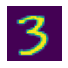

In [14]:
show_image(three_tensors[1])

Now since we are going to get the average pixel density for each of the images in order to build our prediction, we need to stack. PyTorch comes with a handy dandy stack function that allows this to happen. This stacking will create what is called a rank 3 tensor. This act of stacking various tensors is very useful for performing various actions on large datasets. So building these rank 3 tensors is important. 

Also some important information to remember. Rank is the number of axes or dimensions in a tensor. Shape is the size of each of the axis of the tensor. For example when we stack these tensors we will have 3 dimensions: Number of images (6265), size of image width (28), size of image height (28). You cans ee this using the tensor.shape call. The length of the shape is the rank. eg:
```rank = len(tensor.shape)```

Dimension can sometimes be used for the size of an axis (space is three dimensional) where other times it is used for the rank or number of axes (a two dimenional matrix). It can be useful to break down terms into ranks, axis, and length. 


In [15]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape

torch.Size([6265, 28, 28])

In [16]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [17]:
len(stacked_threes.shape)

3

And of course since this is a whole fancy framework we can get the tensors rank directly with ```tensor.ndim``` as shown below.

In [18]:
stacked_threes.ndim

3

Now we that we have rank 3 stacked tensors we can calculate the mean along dimension 0 of the tensor.... that is the this is the dimension that indexes over all the images. This will give us the "idea" image for each number. That is if most of the pixels in any future image match this idea image of these numbers than there is a high likelyhood that the image will be which ever it matchs. 

(torch.Size([28, 28]),
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4285faaed0>)

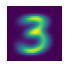

In [19]:
mean3 = stacked_threes.mean(0)

mean3.shape, show_image(mean3)

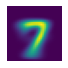

In [20]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

# Mean Absoulte Difference & Root Mean Squared Error
In this section we start to explore how to find the difference between our idea image and our sample.


---
**Chapter 3: Stop And Think - How would you calculate how similar a particular image is to each of our ideal digits?**


In [21]:
a_3 = stacked_threes[1]
a_7 = stacked_sevens[1]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4285f42190>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4285ef8650>)

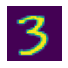

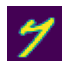

In [22]:
show_image(a_3), show_image(a_7)

In order to find the difference between any random 3 and our "idea" image of a 3, we have a few options.

First we have the Mean Absoulte Difference or L1 Norm, which takes the mean of the absolute value of the differences. 

In [23]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_7_abs = (a_3 - mean7).abs().mean()

dist_3_abs, dist_7_abs

(tensor(0.1114), tensor(0.1586))

Next we have the Root Mean Squared Error (RMSE) or L2 Norm, takes the mean of the square of the differences (this makes it all positive) and then take the square root (this undoes the squaring). 

In [24]:
dist_3_sq = ((a_3 - mean3)**2).mean().sqrt()
dist_7_sq = ((a_3 - mean7)**2).mean().sqrt()
dist_3_sq, dist_7_sq

(tensor(0.2021), tensor(0.3021))

And Pytorch gives you a quick and easy function to use the L1 or L2 Norm. 

In [25]:
F.l1_loss(a_3, mean3), F.l1_loss(a_3, mean7)

(tensor(0.1114), tensor(0.1586))

In [26]:
F.mse_loss(a_3, mean3), F.mse_loss(a_3, mean7)

(tensor(0.0408), tensor(0.0913))

---
# Tensor/Array Experiments
Okay lets take a few mins and review how to set up arrays and tensors using pytorch and numpy. The big thing to keep in mind about the differences is that arrays can be jaggaed, that is each in multi-dimensional array (matrix) the inner arrays may be differnet sizes. These arrays can also have various types with in the data structure. Arrays can not live on the GPU as they are not optimized for that type of computation, due to the features above.

Tensors on the other hand must be a perfect retangle data structure. That is they cannot be jaggaed. Additionally, tensors have strict types which is the basic numerical type. This has the usefulness of allowing them to run on the GPU and proccessa a lot more quickly. Most operations that can be run on numpy arrays will also work on pytorch tensors. 

In [27]:
data = [[1,2,3],[4,5,6]]
arr = array(data)
tns = tensor(data)

Like arrays, Tensors are zero indexed. The remainder of testing will be on tensor only but the array syntax is essentially identical. Tensors are the key component to ML. 

In [28]:
tns[1], tns[0], arr[0], arr[1]

(tensor([4, 5, 6]), tensor([1, 2, 3]), array([1, 2, 3]), array([4, 5, 6]))

With tensors and arrays you will often refer to the dimensions as axes. In this example we use the : to indicate everything on the 1st and 2rd axes.

In [29]:
tns[:,1], tns[:,2]

(tensor([2, 5]), tensor([3, 6]))

You can use python slicing to select parts of the tensor as below.

In [30]:
tns[1,0:3], tns[1,0:2]

(tensor([4, 5, 6]), tensor([4, 5]))

Addition, Subtraction, Mutplication, and divison using standard signs also work well on them. Tensors have a type and will also automatically change from int to float as we see below.

In [31]:
tns.type()

'torch.LongTensor'

In [32]:
tns+1,tns-1

(tensor([[2, 3, 4],
         [5, 6, 7]]), tensor([[0, 1, 2],
         [3, 4, 5]]))

In [33]:
tns*4, tns*4/2

(tensor([[ 4,  8, 12],
         [16, 20, 24]]), tensor([[ 2.,  4.,  6.],
         [ 8., 10., 12.]]))

Thus ends our tinkering on how Tensors and Arrays work. Any more experiments should be conducted above this line. 


---



# Computing Matrics using Broadcasting
When encountering an operation between tensors of different differnt ranks (`len(tensor.shape)` or `tensor.ndim`), pytorch will use a method called broadcasting to extend the smaller ranked tensor into the same size as the larger ranked tensor. This allows various types of matrix operations to be efficently done with pytorch and numpy. Broadcasting is an important thing to keep in mind when creating efficent code. 

In this section we will start to see how that works.

First lets get tensors of our validation set, lets cheat and use our testing set vs finding and splling out the validation set from the training set.

In [34]:
val_sevens_tns = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'7').ls()])
val_sevens_tns = val_sevens_tns.float()/255
val_threes_tns = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/'3').ls()])
val_threes_tns = val_threes_tns.float()/255
val_sevens_tns.shape, val_threes_tns.shape

(torch.Size([1028, 28, 28]), torch.Size([1010, 28, 28]))

We want to eventually want to create a function "is_3" that can take any image and determine its distance from the idea image. In order to do this we need to define the notion of *distance*. Which is basically going to be a function that calculates the distance between two images. We will use the mean absoulte error for this.

Its important to note here that we are subtracting a-b and getting the absolute value, and then the mean((-1, -2)). Notice the dimensional indexing done here. What order we read each dimension. 

  https://stackoverflow.com/questions/59704538/what-is-a-dimensional-range-of-1-0-in-pytorch

  https://stackoverflow.com/questions/59702785/what-does-dim-1-or-2-mean-in-torch-sum

In [35]:
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))

In [36]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [37]:
mean3.shape, val_threes_tns.shape

(torch.Size([28, 28]), torch.Size([1010, 28, 28]))

In [38]:
val_three_dist = mnist_distance(val_threes_tns, mean3)
val_three_dist, val_three_dist.shape, val_three_dist.type()

(tensor([0.1233, 0.1814, 0.1329,  ..., 0.1317, 0.1194, 0.1383]),
 torch.Size([1010]),
 'torch.FloatTensor')

Here is another example of broadcasting more specifically spelled out. Notice the rank of each of the tesnsors, and then when we subtract the larger tensor from the smaller tensor.  One thing to keep in mind when using these broadcasting is that pytorch is not actually creating 1010 additional copies of the data to increase the size its tensor to match the larger. Its not actually allocating memory. Its simply doing some tricky math in the background to accomplish this. 

In [39]:
len(val_threes_tns.shape), len(mean3.shape), len((val_threes_tns-mean3).shape)

(3, 2, 3)

# Finishing up Pixel Similarity
In this section we will create our is_3 function and do some testing on it, then we will calculate our accuracy! 

Now lets make the is_3 function. Well use mnist distance function to determine if the distance between the digit in question and the idea 3 is less than the distance to the idea 7, then its a 3. 

In [40]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

Now lets test it with our two example data points.

In [41]:
is_3(a_3),is_3(a_3).float(), is_3(a_7), is_3(a_7).float()

(tensor(True), tensor(1.), tensor(False), tensor(0.))

And thanks to broadcasting, we can actually test this on our entire test range of 3s, and 7s.

In [42]:
is_3(stacked_threes),is_3(stacked_sevens)

(tensor([True, True, True,  ..., True, True, True]),
 tensor([False, False, False,  ..., False, False, False]))

In [43]:
accuracy_3s = is_3(val_threes_tns).float().mean()
accuracy_7s = (1-is_3(val_sevens_tns).float()).mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# Stochastic Gradient Descent
 Gradient Descent gives us the ability to turn out simple pixel similarity into a proper machine learning algorithm. Remember Arthur Samuel describes machine learning... *Suppose we arrange for some automatic means of testing the effectiveness of any current weight assignment in therms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance.* 

 Gradeient Descent provides that method. 

1.   ***Initialize*** the Weights
2.   For each image, use the weights to ***predict*** wheather it appears to be a 3 or 7.
3.  Based on the predictions, calculate how well the model did (***loss***)
5. Calculate the ***gradient*** which measures for each weight how changing that weight would change the loss.
5. ***Step*** (that is change) all the weights based on that loss calculation. 
6. Go back to step 2 and ***repeat*** the process.
7. Iterate until you decide to ***stop*** the training process (for instances because the model is good enough or you dont want to wait any longer)




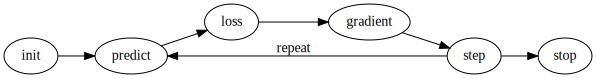

In [44]:
#@title 7 steps to gradient descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## End to End - SGH Example
Here we will go through each of the 7 steps of gradient descent in a end to end example using some synthetic data. Consider you are measuring the pssed of a roller coaster as it went over the top of a hump. Here is an example of that data. With the random noise added into the data, its difficult to tell answer the question "What was the roller coasters speed?"

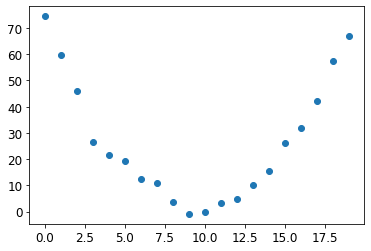

In [45]:
time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

Instead of guessing every function, we can use a quadratic equation: `a*(time**2)+(b*time)+c` which we can turn into a function.  Using this forumla we can find a quadratic function that best fits this data. 

In [46]:
def f(t, params):
  a,b,c = params
  return a*(t**2) + (b*t) + c

In order to train all the weights though we need to define what "best" in this case means. We define that by choosing a ***loss function***, which returns a value based on its prediction and a target. It is common for continuous data to use the ***mean squared error***:

In [47]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

### Step 1: Initialize the parameters 
First we are going to initalize all the parameters to random values and tell pytorch we want to track the gradients

In [48]:
params = torch.randn(3).requires_grad_()

### Step 2: Calculate the predictions
Next we calculate the predictions and lets graph our predictions and see how close they are.

In [49]:
preds = f(time, params)

In [50]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)

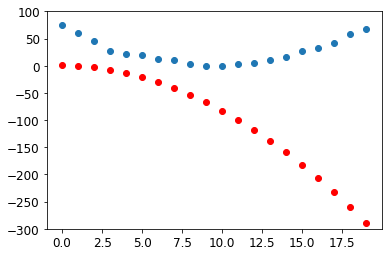

In [51]:
show_preds(preds)

### Step 3: Calculate the loss
We calculate the lose using MSE.

In [52]:
loss = mse(preds, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward0>)

### Step 4: Calculate the Gradients

In [53]:
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [54]:
params.grad * 5e-4

tensor([-0.0828, -0.0053, -0.0004])

In [55]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

### Step 5: Step the Weights

In [56]:
lr = 5e-4
params.data -= lr * params.grad.data
params.grad = None

Let see if loss has imporved

In [57]:
preds = f(time,params)
mse(preds,speed)

tensor(146.9607, grad_fn=<SqrtBackward0>)

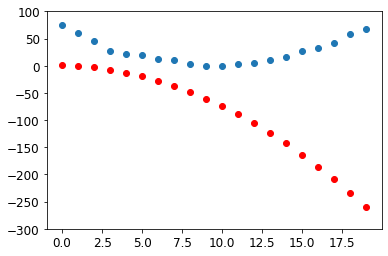

In [58]:
show_preds(preds)

In [59]:
def apply_step(params, prn=True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad.data
  params.grad = None
  if prn: print(loss.item())
  return preds

### Step 6: Repeat the process

Running this mutiple times allows it to lower its loss furthur and furthur.

In [60]:
epochs = 0

In [61]:
for i in range(10): 
  apply_step(params)
  epochs += i

146.96066284179688
133.30130004882812
119.7451400756836
106.32939910888672
93.11066436767578
80.17842102050781
67.68006134033203
55.868141174316406
45.1834716796875
36.35578918457031


In [62]:
epochs

45

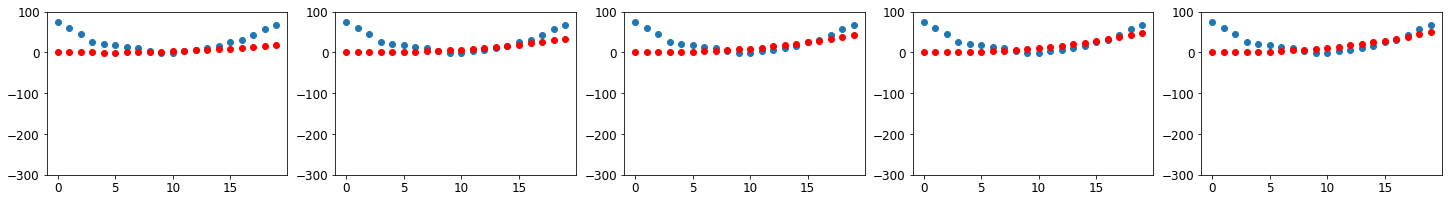

In [63]:
_,axs = plt.subplots(1,5,figsize=(25,3))
for ax in axs: show_preds(apply_step(params, False), ax)

### Step 7: Stopping.
Stoping the repeat when the loss stops going down, as you can see happened above near the 4000ths iteration.

# MNIST Loss Function
Four our example, we have our X's which are the individual pictures in the dataset. Next we will combine them all into a single tensor and transform them into a rank 2 tensor. This is accomplished by using the view method which changes the shape of a tensor with out changing the contents. -1 is a parameter for view that means "make this axis as big as necessary to fit all the data".

## Data prep

In [64]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

In [65]:
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

Getting the dataset into a tuple of (x,y) using pythons zip function.

In [66]:
dset = list(zip(train_x, train_y))
x,y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

Now do the above steps for the validation set. 

In [67]:
valid_x = torch.cat([val_threes_tns, val_sevens_tns]).view(-1, 28*28)
valid_y = tensor([1]*len(val_threes_tns) + [0]*len(val_sevens_tns)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

## Parameter Initialization 

Now lets ***initalize*** a random weight for every pixel. 

In [68]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [69]:
weights = init_params((28*28,1))

The function weights\*pixels will be equal to 0 when pixels are equal to 0 (i.e its intercept is 0). This is not really flexiable enough since `y=w*x+b` is the forumla for a line, and we still need the b. So lets assign the bias a random number as well. The Weights in the equation are w, the bias is b and x is the image.

In [70]:
bias = init_params(1)

Now lets calculate the prediction for one image. 

In [71]:
(train_x[0]*weights.T).sum()+bias

tensor([20.2336], grad_fn=<AddBackward0>)

Now we will create a function for some matrix multiplication. In python matrix mutplication is represented by @. So the below is actually `xb*weights + bias` This will create a function that can be used to create predictions for every item in the dataset.

In [72]:
def linear1(xb): return xb@weights + bias

In [73]:
preds - linear1(train_x)

tensor([[ -18.8807,  -20.3091,  -23.1036,  ..., -228.9612, -253.6144, -279.6337],
        [ -15.7114,  -17.1398,  -19.9343,  ..., -225.7920, -250.4451, -276.4644],
        [ -13.8854,  -15.3138,  -18.1083,  ..., -223.9660, -248.6191, -274.6384],
        ...,
        [ -17.0274,  -18.4558,  -21.2503,  ..., -227.1080, -251.7611, -277.7804],
        [ -22.5037,  -23.9321,  -26.7267,  ..., -232.5843, -257.2374, -283.2567],
        [ -27.3287,  -28.7571,  -31.5516,  ..., -237.4092, -262.0624, -288.0817]], grad_fn=<SubBackward0>)

In [74]:
preds

tensor([ 1.3529e+00, -7.5441e-02, -2.8700e+00, -7.0307e+00, -1.2558e+01, -1.9451e+01, -2.7710e+01, -3.7335e+01, -4.8327e+01, -6.0684e+01, -7.4408e+01, -8.9498e+01, -1.0595e+02, -1.2378e+02,
        -1.4297e+02, -1.6352e+02, -1.8544e+02, -2.0873e+02, -2.3338e+02, -2.5940e+02], grad_fn=<AddBackward0>)

Now lets check the accuracy. To decide if output is a 3 or a 7 we simply need to check to see if its greater than 0. Using broadcasting we can check the entire dataset with out looping, as follows.

In [75]:
corrects = (preds > 0.0).float() == train_y

In [76]:
corrects

tensor([[ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        [ True, False, False,  ..., False, False, False],
        ...,
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True],
        [False,  True,  True,  ...,  True,  True,  True]])

In [77]:
acc = corrects.float().mean().item()
acc

0.5048644542694092

Now change a weight to see how it impacts accuracy. We will run through these weight changes twice to see what happens...

In [78]:
weights.data[0] *= 1.0001

In [79]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.4912068545818329

You can see that after the second pass there is no change in the accuracy. This is because we need gradients in order to improve our model using SGD. In order to calculate the gradients we need to have defined a ***loss function***! Remember gradients are a mesure of how the loss function changes based on small changes to the weights. 

## Loss Function V1

>>**Math Info:** Accuracy is a function that is constant almost everywhere (excapt at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at the threshold). This then gives gradients that are 0 or infinate which are usless for updating the model.



The purpose of the loss function is to measure the difference between the predicted value and the true values. As you can see we pass in the tensors for the prediction (hypothesis) and the target (labels)

In [80]:
def mnist_loss(prediction, targets):
  return torch.where(targets==1, 1-prediction, prediction).mean()

### torch.where()
Here we are going to talk about there `torch.where()` function and its use as part of the loss function. This is essentially the same as running 
`[b[i] if a[i] else c[i] for i in range(len(a))]` but it can run at cuda speed on tensors. What this does is measure the distance each prediction is from 1 if it should be 1 and distance from 0 if it should be 0.




In [81]:
trgts = tensor([1,0,1])
prds = tensor([0.900, 0.400, 0.200])

In [82]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

What the above loss function does is take this distance, and give us the mean value of it since we need a scalar (1D tensor) to determine the gradients and what changes need to be made to the weights.. 

In [83]:
mnist_loss(prds, trgts)

tensor(0.4333)

In [84]:
mnist_loss(tensor([0.9,0.4,0.8]), trgts)

tensor(0.2333)

You can find more info by using the help function like below.

In [85]:
help(torch.where)

Help on built-in function where:

where(...)
    where(condition, x, y) -> Tensor
    
    Return a tensor of elements selected from either :attr:`x` or :attr:`y`, depending on :attr:`condition`.
    
    The operation is defined as:
    
    .. math::
        \text{out}_i = \begin{cases}
            \text{x}_i & \text{if } \text{condition}_i \\
            \text{y}_i & \text{otherwise} \\
        \end{cases}
    
    .. note::
        The tensors :attr:`condition`, :attr:`x`, :attr:`y` must be :ref:`broadcastable <broadcasting-semantics>`.
    
    .. note::
        Currently valid scalar and tensor combination are
        1. Scalar of floating dtype and torch.double
        2. Scalar of integral dtype and torch.long
        3. Scalar of complex dtype and torch.complex128
    
    Arguments:
        condition (BoolTensor): When True (nonzero), yield x, otherwise yield y
        x (Tensor or Scalar): value (if :attr:`x` is a scalar) or values selected at indices
                       

## Sigmoid Function
One problem with the above loss function is it requires a value between 0 and 1 to work. In this part I will look at the sigmoid function, and how to use it with this loss function. 

A sigmoid can be defined using the following function

In [86]:
def sigmoid(x): return 1/(1+torch.exp(-x))

But this is unnessicary as pytorch has a built in sigmoid function that works at cuda speed. Lets plot what a sigmoid looks like using that. 

/usr/local/lib/python3.7/dist-packages/fastbook/__init__.py:74: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  ../aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


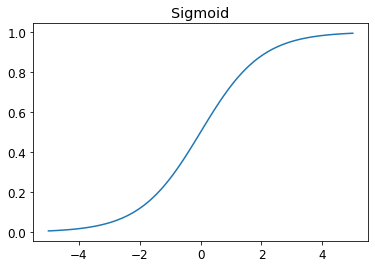

In [87]:
plot_function(torch.sigmoid, title='Sigmoid', min=-5, max=5)

AS you can see, a sigmoid function takes any input value and smushes it between 0 and 1. Its also a smooth curve which makes it easier for SGD to find gradients. 

## Updated mnist_loss function
We will modify our mnist_loss function to put the predictions through a sigmoid before running them through the where function.

In [88]:
def mnist_loss(prediction, targets):
  prediction = prediction.sigmoid()
  return torch.where(targets==1, 1-prediction, prediction).mean()

##Metrics vs Loss


One important difference to understand is the difference between metric and loss. Metrics are for humans and loss is to drive the automated learning. The loss function must have meaningful derivatives that produce a smooth curve with no large flat sections and no big jumps. This is why its important to make a loss function that responds to small changes in the confidence level. The loss function is calculated on each item in our data set and the loss values are all averaged and the mean is reported at the end of each epoch. 

Metrics are the numbers that we care about. They are the values that are preinted at the end of each epoch that tell us how the model is doing. You should focus on these metrics vs the loss because these metrics are more meaningful performance of the model.

## SGD and Mini-Batchs - Optimization Step
The ***optimization step*** is the next step of the learning process, and its goal is to change or update the weights based on the gradients. We could calculate it for the whole dataset would be very accurate but would take a very long time. Alternativly if we calculate it per item we would have very little data which would lead to an imprecise and unstable gradient.

***Mini-batchs*** are a compromise to the problem stated above, they are a smaller subset of number of items based on the ***batch size***. The average loss is caluclated for all the items in this mini batch. A larger batch size will use more GPU memory but produce more accurate graidents. This in practice makes the GPU happy because it is really good at handling tensor calculations on a lot of data, however you have to be careful because they can easily run out of memory. Controlling batch size will be something ill continue to experiment with and take notes on through out all my notebooks. 

### DataLoaders
The easiest way to break up all of the data in a dataset is to use pytorchs dataloaders. This function will take any python collection and turn it into iterable batchs of set size. It can also do useful things like shuffle the the items before splitting them into batchs. 

Lets play with some dataloaders.

In [89]:
col = range(15)

In [90]:
dl = DataLoader(col, batch_size=5, shuffle=True)
dl_noshuf = DataLoader(col, batch_size=5, shuffle=False)

In [91]:
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [92]:
list(dl_noshuf)

[tensor([0, 1, 2, 3, 4]),
 tensor([5, 6, 7, 8, 9]),
 tensor([10, 11, 12, 13, 14])]

As you can see shuffle is a good way to mix up the dataset during training. In other cases it might be good to keep the dataset in order (for example in the case of RNNs for NLP). 

However for models we are not using just a plane old python collection, but a a collection containing independent and dependent variables. This collection of dependent and indepenent variables is a *dataset* in pytorch. 

Here is a simple *Dataset*

In [93]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [94]:
dl = DataLoader(ds, batch_size=5, shuffle=True)
list(dl)

[(tensor([19, 14,  0, 24, 20]), ('t', 'o', 'a', 'y', 'u')),
 (tensor([12, 23,  8,  9,  3]), ('m', 'x', 'i', 'j', 'd')),
 (tensor([16,  6,  4,  7,  1]), ('q', 'g', 'e', 'h', 'b')),
 (tensor([13,  2, 22,  5, 17]), ('n', 'c', 'w', 'f', 'r')),
 (tensor([18, 10, 11, 15, 25]), ('s', 'k', 'l', 'p', 'z')),
 (tensor([21]), ('v',))]

In [95]:
list(dl)[2] 

(tensor([15, 22, 14, 17,  6]), ('p', 'w', 'o', 'r', 'g'))

As you can see, loading that small dataset into the Dataloader splits it into batchs that are tuples of tensors representing the independent and dependent variables. 

# Putting it all together

Below we have the graident descent steps shown. In this section we are going to add graident descent and all the required steps to our number classification model. 

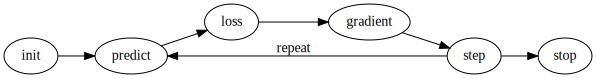

In [96]:
#@title Gradient Descent Steps
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

## Manually creating each step

First initalize parameters

In [97]:
weights = init_params((28*28,1))
bias = init_params(1)

Now create the dataloader from a dataset

In [98]:
dl = DataLoader(dset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

Next do the same thing for the validation dataset

In [99]:
val_dl = DataLoader(valid_dset, batch_size=256)

Now create a mini batch of size 4 for testing

In [100]:
batch = train_x[:15]
batch.shape

torch.Size([15, 784])

In [101]:
preds = linear1(batch)
preds

tensor([[-16.3989],
        [ -7.9580],
        [-11.7045],
        [-21.6327],
        [ -6.7190],
        [-10.9902],
        [-16.5995],
        [-18.3543],
        [  1.9229],
        [-21.4763],
        [-17.1510],
        [-11.3871],
        [ -3.6849],
        [-13.3123],
        [-17.7159]], grad_fn=<AddBackward0>)

In [102]:
loss = mnist_loss(preds, train_y[:15])
loss

tensor(0.9401, grad_fn=<MeanBackward0>)

Calculate the gradients

In [103]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0015), tensor([-0.0091]))

Lets combine all this into a function.

In [104]:
def calc_grad(xb, yb, model):
  preds = model(xb)
  loss = mnist_loss(preds, yb)
  loss.backward()

In [105]:
calc_grad(batch, train_y[:15], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0030), tensor([-0.0182]))

In [106]:
calc_grad(batch, train_y[:15], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0044), tensor([-0.0274]))

When you call it a second time the gradients will chagne. This is because loss.backward adds to the gradients of loss on any graidents that are currently stored. So lets zero it out. Notice the _ at the end of the zero method? This is because in PyTorch any method that ends in an underscore modifies their objects inplace. For instance, bias.zero_ sets all elements of the tensor bias to 0.

In [107]:
weights.grad.zero_()
bias.grad.zero_()

tensor([0.])

Now the only remaining step is to update the biases based on the gradient and learning rate. Where Model is Liner1, LR = learning rate, and params = data loader.

In [108]:
def train_epoch(model, lr, params):
  for xb,yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In ordeer to keep track of how we are doing we will be looking at the accuracy of the validation set. To determine if the output is 3 or 7 we can just check wheather is greater than 0.5. Using broadcasting to make it fast we can do it in this method. Next we will wrap this into a function and give it a test. 

In [109]:
(preds>0.5).float() == train_y[:15]

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [110]:
def batch_accuracy(xb, yb):
  preds = xb.sigmoid()
  correct = (preds>0.5) == yb
  return correct.float().mean()

In [111]:
batch_accuracy(linear1(batch), train_y[:15])

tensor(0.0667)

Now lets build a function to run against our validation set.

In [112]:
def validate_epoch(model):
  accs = [batch_accuracy(model(xb), yb) for xb, yb in val_dl]
  return round(torch.stack(accs).mean().item(), 4)


In [113]:
validate_epoch(linear1)

0.5727

This is the starting point for our models accuracy. Now lets train it again and see what happens to our accuracy.

In [114]:
lr = 1. 
params = weights, bias 
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.849

Now lets train it 20 more times, and see what happens to the accuracy. x

In [115]:
for i in range(20):
  train_epoch(linear1, lr, params)
  print(validate_epoch(linear1), end=' ')

0.9198 0.9398 0.95 0.9569 0.9598 0.9613 0.9632 0.9642 0.9667 0.9677 0.9701 0.9706 0.9725 0.973 0.9735 0.9745 0.9755 0.9755 0.975 0.976 

## Creating an Optimizer

Instead of doing all of the steps above manually, its best to create what is known as an Optimizer to handle all of the SGD steps for you. We can furthur make this optimizer easier by replacing some of the manual functions we created above with built in pytorch functions.



First lets take care of our model and initalizers. Above we created the functions `init_params()` which was used  to set the weights and biases to random initial values. It will also replace `liner1()` which was used to create predictions on each item in the batch. We instead of these use a `nn.Module` which are basically functions in pytroch but are specific types of neural networks. 

In [116]:
linear_model = nn.Linear(28*28,1)

In [117]:
w,b = linear_model.parameters()
w.shape, b.shape

(torch.Size([1, 784]), torch.Size([1]))

### Optimzer

In [118]:
class BasicOptim:
  def __init__(self, params, lr): 
    self.params = list(params)
    self.lr = lr
  
  def step(self, *args, **kwargs):
    for p in self.params:
      p.data -= p.grad.data * self.lr
  
  def zero_grad(self, *args, **kwargs):
    for p in self.params:
      p.grad = None


We can create our optimizer object by passing in our models parameters.

In [119]:
lr = .1
opt = BasicOptim(linear_model.parameters(), lr)

Now we can make simple our train_epoch function by giving it the model 

In [120]:
def train_epoch(model):
  for xb,yb in dl:
    calc_grad(xb,yb, model)
    opt.step()
    opt.zero_grad()

Our `validate_epoch(model)`works just fine!

In [121]:
validate_epoch(linear_model)

0.7135

Now we can put it all in a nice function that can do the training and stepping for us.

In [122]:
def train_model(model, epochs):
  for i in range(epochs):
    train_epoch(model)
    print(validate_epoch(model), end=' ')

In [123]:
train_model(linear_model, epochs=20)

0.5669 0.8706 0.9321 0.954 0.9623 0.9618 0.9652 0.9667 0.9676 0.9696 0.9706 0.9715 0.9715 0.972 0.9715 0.9715 0.9715 0.9715 0.9725 0.9725 

## FastAI SGD shortcut and Learners

Fast AI provides a SGD class that does the same thing as our BasicOptim class, and we can use that instead of building our own SGD Optimizer..

In [124]:
linear_model = nn.Linear(28*28,1)
lr = .1
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.5547 0.8706 0.9335 0.954 0.9633 0.9642 0.9652 0.9671 0.9681 0.9701 0.9706 0.9701 0.9706 0.972 0.9715 0.9715 0.9715 0.972 0.972 0.9725 

FastAI also providers Learners, which can be used to train your models instead of `train_model()` function we created. They have a number of features built in that are very useful, such as `Learner.fit`

To create a learner we will first need to create a dataloaders.

In [125]:
dls = DataLoaders(dl, val_dl)

Then we need to pass all of the elements we created, the DataLoaders, the model, optimization function (which will be passed the parameters), loss function and any metrics to print. Once we have the learner created, then we run `Learner.fit()` to train it.

In [126]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [127]:
learn.fit(20, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.214864,0.366200,0.548086,00:00
1,0.121043,0.182138,0.872424,00:00
2,0.083574,0.108150,0.934249,00:00
3,0.065567,0.080873,0.951914,00:00
4,0.055801,0.067443,0.964671,00:00
5,0.049892,0.059517,0.964671,00:00
6,0.045942,0.054277,0.964181,00:00
7,0.043073,0.050540,0.965162,00:00
8,0.040854,0.047724,0.967125,00:00
9,0.039058,0.045516,0.968106,00:00


# Adding a Non-linearity & Neural Networks
Now that we have finished a simple **linear classifier** its time to replace the linear model with a neural network. A linerar classifier is limited in that it accomplish and to do more complex tasks we need to add something other than ax+b between the two linerar classifers. This is what builds a neural network.

This is an entire definition of a basic neural network. This small neural network consists of two linear classifiers with a max function between them.

In [128]:
def simple_net(xb):
  res = xb@w1 + b1
  res = res.max(tensor(0.0))
  res = res@w2 + bz2
  return res

Each line of code represents a layer of a NN. In this case the first and third are called **linear layers** and the `res.max(tensor(0.0))` (ReLU) is called the **nonlinearity** or **activation function** 

In [129]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

The key point is that w1 has 30 output activations which means that w2 must have 30 input activations so they match. That means the first layer can construct 30 different features each representing a differnt mix of pixels. 

The `res.max(tensor(0.0))` is called a ***rectified linear unit*** or ReLU. IT simply replaces every negative number with a zero. See below.

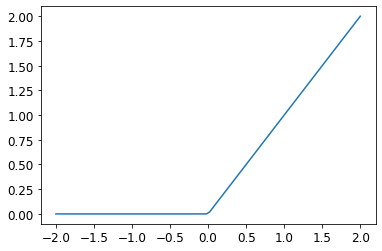

In [130]:
plot_function(F.relu)

We can actually simply this furthur down using pytorch features.

In [131]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

We will use the `nn.Sequential` to run all of our NN layers in the correct order at the correct time. Tis module will contain all the parameters needed to build our learner.

In [132]:
learn_simple = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [133]:
learn_simple.fit(40, .01)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.487388,0.457182,0.924926,00:00
1,0.445047,0.404287,0.916585,00:00
2,0.386145,0.339612,0.911187,00:00
3,0.318945,0.271682,0.927870,00:00
4,0.254941,0.212314,0.940137,00:00
5,0.202246,0.168198,0.948479,00:00
6,0.162798,0.137939,0.957311,00:00
7,0.134591,0.117297,0.958783,00:00
8,0.114613,0.102823,0.959764,00:00
9,0.100280,0.092297,0.961236,00:00


When we run `learn.fit` the training process is recorded in `learn.recorder` and can be used to plot things like the accuracy over time.

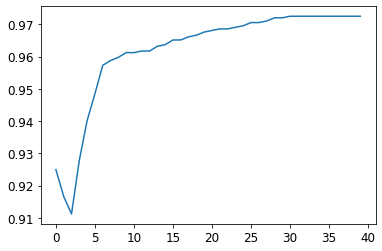

In [134]:
plt.plot(L(learn_simple.recorder.values).itemgot(2))

And we can view the final accuracy using the recorder as well.

In [135]:
learn.recorder.values[-1][2]

0.9715407490730286

# Chapter Recap

## Jargon Recap

A Neural network contains two types of numbers: Numbers that are calculated, and the parameters these numbers are calculated from. This leads to:

**Activations** - Numbers that are calculated (both by linear and nonlinear layers)

**Parameters** - Numbers that are randomly initialized, and optimized (that is, the numbers that define the model)

These *activations* and *parameters* are all contained in **tensors**: which are just reguarlly shaped arrays, for example a matrix. Tensors contain rows and columns like a matrix however they are called **axes** or **dimensions** and each tensor dimension has a *rank*

* **Rank-0** Tensor is known as a **scalar** 
* **Rank-1** Tensor is known as a **vector**
* **Rank-2** Tensor is known as a **matrix**

Neural networks contain a number of **layers** the more layers the *deeper* the neural network is. Each of these is either a **linear** or **nonlinear** layer. Often the nonlinear layer will be referred to as the **activation function**.

*  ReLU - Activation function that returns 0 for negative numbers and doesnt change postive numbers.
* Mini-batch - A small group of inputs and labels gathered togetehr in two arrays. A Gradient descent step is updated on this batch (rather then a whole epoch)
* Forward pass - Applying the model to some input and computing the predictions
* Loss - A value that represents how well (or badly) our model is doing.
* Gradient - The derivative of the loss with respect to some parameter of the model.
* Backward pass - computing the gradients of the loss with respect to all the model parameters.
* Graident descent - Taking a step in the direction opposite to the gradients to make the model parameters a little bit better. 
* Learning rate - The size of the step we take when applying SGD to the update parameters of the model. 

## Questionnaire

1: How is a grayscale image represented on a computer? How about a color image?

2: How are the files and folders in the MNIST_SAMPLE dataset structured? Why?

>The folders are seperated into labels, for both training and validation. The training set is used by the model to learn the weights and bias. This is the information that the model is built using. The validation or testing set is data that the model should have never seen before and will test the model to ensure its preforming accuratly.  The best method is to actually use 3 data sets, Training Validation and Testing. Where training is used to train the model, validation is used to improve the model... and testing is the final dataset that the model should never be trained on in any way but simply ran against. 

3: Explain how the "pixel similarity" approach to classifying digits works.

> Pixel similarity works by taking the average of all the training data images to create "ideal" mappings of 3's and 7s.  Once it has this image of an ideal digit it can then take any new digit and compare its pixels to the ideal image and calculate the distance between the ideal image and the image presented.  

4: What is a list comprehension? Create one now that selects odd numbers from a list and doubles them.

> List comprehension is a useful way to unpack lists with specific filtering. The syntax for list comprehension makes it all make sense.  
>
> new_list = [ *expression* for *item* in *iterable* if *condition* == True]
>
> The *expression* is the current iteration element, and the outcome. For example you can have a function that returns something as an expression, or you may simply mutiply the results as i did in the example below. 
>
>Each loop an *item* in an *iterable* is checked against the *condition* (which should be a simple boolean operation) and if the condition is passed, the *expression* is executed. 
>
>Here is the question example. 



In [136]:
test_list = list(range(20))
odd_list = [o*2 for o in test_list if not o % 2 == 0]

In [137]:
test_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [138]:
odd_list

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38]

5: What is a "rank-3 tensor"?

>A rank 3 tensor is a tensor with 3 dimensions. 

In [139]:
rnk3 = tensor(
    [
     [
      [0,1,2],[3,4,5]
      ],
     [
      [6,7,8],[9,10,11]
      ]
    ]
  )
rnk3.ndim

3

In [140]:
rnk3[1][0][2]

tensor(8)

6: What is the difference between tensor rank and shape? How do you get the rank from the shape?

> **Rank** is the number of axes or dimensions in a tensor
>
>**Shape** is the size of each axis of a tensor
>
>The `len(tensor.shape)` is its rank. However it is just as easy to use `tensor.ndim` to get a tensors rank. 


7: What are RMSE and L1 norm?

> RMSE and L1 norm are functions used to determine the distance from our ideal version of a 3. They work like this...
>
> * Mean absolute difference (L1 Norm) - Is the mean of the absolute value of the differences.
>
> * Root Mean Squared Error - Take the mean of the square of differences (which makes everything positive) and then take the square root (which undoes the squaring). Also called L2 Norm. 



8: How can you apply a calculation on thousands of numbers at once, many thousands of times faster than a Python loop?

> You would use the broadcasting ability of tensors. When doing calculations on a tensors of differnt ranks, pytorch will do some fancy math in the background and extend the smaller tensor to be the same size as the larger tensor, with our using addtional memory space. This allows those calculations to be ran on the GPU much faster. 

9: Create a 3×3 tensor or array containing the numbers from 1 to 9. Double it. Select the bottom-right four numbers.

In [141]:

test_nine = tensor([
                    [[1],[2],[3]],
                    [[4],[5],[6]],
                    [[7],[8],[9]]
                    ])
test_nine.ndim

3

In [142]:
test_nine = test_nine * 2
test_nine

tensor([[[ 2],
         [ 4],
         [ 6]],

        [[ 8],
         [10],
         [12]],

        [[14],
         [16],
         [18]]])

In [143]:
test_nine[1:3,1:3]

tensor([[[10],
         [12]],

        [[16],
         [18]]])

10: What is broadcasting?

> When doing calculations on a tensors of differnt ranks, pytorch will do some fancy math in the background and extend the smaller tensor to be the same size as the larger tensor, with our using addtional memory space. This allows those calculations to be ran on the GPU much faster.

11: Are metrics generally calculated using the training set, or the validation set? Why?

>Metrics are calculated using the validation set, because this is the set of data is has never seen. Other wise the model could just be memorizing the dataset (overfitting).

12: What is SGD?

>Stochastic Gradient Descent is the method used to learn. That is, it is how we calculate the changes to the weights and bias automatically every epoch. 

13: Why does SGD use mini-batches?

>Because calculating the gradients for every single item in a dataset takes a lot of time and produces jagged gradients that may jump around.

14: What are the seven steps in SGD for machine learning?

>1.   Initialize the parameters 
2.   Calculate the predictions
3.   Calculate the loss
4.   Calculate the gradients
5.   Step the weights
6.   Repeat the process
7.   Stop.



15: How do we initialize the weights in a model?

>We can typically assign them random values. As they will start to get better nearly immediately. 

16: What is "loss"?

>Loss is a value that represnets how our model is doing. It is calculated using the distance between the prediction, and the actual value on the training set. Then its procesed using some activation function such as ReLU. 

17: Why can't we always use a high learning rate?

>Using a high learning rate would potentially leading to the training failing to diverge, or could cause the loss to go up.    

18: What is a "gradient"?

>The gradient is defined as the rise/run - that is the change in the value of the function divided by the change in the value of the parameter. Its what we use to determine the amount we need to change the weights and bias by. The actual value is a derivative of the loss.


19: Do you need to know how to calculate gradients yourself?

>No, but it does help.

20: Why can't we use accuracy as a loss function?

Using accuracry as a loss function doesnt work because a small change in weights in bias may not nessicarly show any change in accuracy. Mathmatically - Accuracy is a function that is constant almost everywhere (except at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at the threshold). This produces graidents that are then either 0 or infinity. 

21: Draw the sigmoid function. What is special about its shape?

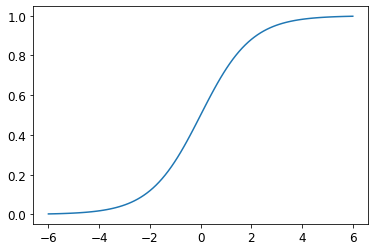

In [161]:
plot_function(torch.sigmoid, min=-6, max=6)

>The sigmoid takes makes negative numbers 0 and positive numbers 1, and it does it in a smooth gradient. 

22: What is the difference between a loss function and a metric?

>A metric is a human significant thing that gauages the performance of our model, the loss function must have a meaninful derivative to drive automated learning. This derivative the loss function creates generates the gradients required to adjust our weights and bias. The weights and bias testing on the validation data will show us our accuracy which is a human readable metric. 

23: What is the function to calculate new weights using a learning rate?

Stochastic Gradient Descent - `SGD(linear_model.parameters(), lr)`

24: What does the DataLoader class do?

25: Write pseudocode showing the basic steps taken in each epoch for SGD.

26: Create a function that, if passed two arguments [1,2,3,4] and 'abcd', returns [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]. What is special about that output data structure?

27: What does view do in PyTorch?

28: What are the "bias" parameters in a neural network? Why do we need them?

29: What does the @ operator do in Python?

>Matrix Mutplication

30: What does the backward method do?

31: Why do we have to zero the gradients?

32: What information do we have to pass to Learner?

33: Show Python or pseudocode for the basic steps of a training loop.

34: What is "ReLU"? Draw a plot of it for values from -2 to +2

35: What is an "activation function"?

36: What's the difference between F.relu and nn.ReLU?

37: The universal approximation theorem shows that any function can be approximated as closely as needed using just one nonlinearity. So why do we normally use more?

## Furthur Research

1: Create your own implementation of Learner from scratch, based on the training loop shown in this chapter.

Link to notebook: 

2: Complete **all the steps** in this chapter using the full MNIST datasets (that is, for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete!

Link to notebook: 